## Core Trip Analysis — Decision Context

This analysis focuses on trip-level micromobility data to surface
operational, revenue, and energy-related insights that can inform
pricing, fleet deployment, and battery operations.

This is not descriptive reporting.
The goal is decision enablement.


In [22]:
import pandas as pd
import os

DATA_PATH = os.path.abspath(
    os.path.join(os.getcwd(), "..", "data", "final", "lime_final.csv")
)

df = pd.read_csv(DATA_PATH, parse_dates=["start_time", "end_time"])
print("Rows loaded:", len(df))


Rows loaded: 199879


In [23]:
df.head()


,User_id,User_catgo,trip_id,start_time,end_time,start_lat,start_lng,end_lat,end_lng,duration_min,vehicle_type,zone_id,Trip cost,Discount,Invoice,city,temperature,rain,wind
0,UNKNOWN,unknown,82b05060-2520-499d-b82c-b9433e55d313,2022-07-19 14:00:00,2022-07-19 14:00:00,41.744205,-87.656307,41.744205,-87.656307,209,scooter,UNASSIGNED,42.8,0.0,42.8,Chicago,NaN,NaN,NaN
1,UNKNOWN,unknown,f76efc95-5408-424a-83fd-9f58c31ef05a,2022-07-17 19:00:00,2022-07-17 20:00:00,41.947792,-87.683835,41.944227,-87.655999,604,scooter,UNASSIGNED,121.8,0.0,121.8,Chicago,NaN,NaN,NaN
2,UNKNOWN,unknown,19540efa-e588-44a4-bcc5-90be074218c4,2022-07-18 18:00:00,2022-07-18 18:00:00,41.965812,-87.655879,41.965812,-87.655879,532,scooter,UNASSIGNED,107.4,0.0,107.4,Chicago,NaN,NaN,NaN
3,UNKNOWN,unknown,3bd8a49a-25e7-4f3b-ba46-f0c27c248d12,2022-07-17 17:00:00,2022-07-17 17:00:00,41.938666,-87.711211,41.938666,-87.711211,210,scooter,UNASSIGNED,43.0,0.0,43.0,Chicago,NaN,NaN,NaN
4,UNKNOWN,unknown,540100c8-5989-405d-b85e-107668e31a05,2022-07-19 13:00:00,2022-07-19 14:00:00,41.938666,-87.711211,41.938666,-87.711211,2189,scooter,UNASSIGNED,438.8,0.0,438.8,Chicago,NaN,NaN,NaN


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199879 entries, 0 to 199878
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   User_id       199879 non-null  object        
 1   User_catgo    199879 non-null  object        
 2   trip_id       199879 non-null  object        
 3   start_time    199879 non-null  datetime64[ns]
 4   end_time      199879 non-null  datetime64[ns]
 5   start_lat     199879 non-null  float64       
 6   start_lng     199879 non-null  float64       
 7   end_lat       199717 non-null  float64       
 8   end_lng       199717 non-null  float64       
 9   duration_min  199879 non-null  int64         
 10  vehicle_type  199879 non-null  object        
 11  zone_id       199879 non-null  object        
 12  Trip cost     199879 non-null  float64       
 13  Discount      199879 non-null  float64       
 14  Invoice       199879 non-null  float64       
 15  city          199

In [25]:
df.describe(include="all")


,User_id,User_catgo,trip_id,start_time,end_time,start_lat,start_lng,end_lat,end_lng,duration_min,vehicle_type,zone_id,Trip cost,Discount,Invoice,city,temperature,rain,wind
count,199879,199879,199879,199879,199879,199879.000000,199879.000000,199717.000000,199717.000000,199879.000000,199879,199879,199879.000000,199879.0,199879.000000,199879,0.0,0.0,0.0
unique,1,1,199879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN
top,UNKNOWN,unknown,82b05060-2520-499d-b82c-b9433e55d313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scooter,UNASSIGNED,NaN,NaN,NaN,Chicago,NaN,NaN,NaN
freq,199879,199879,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199879,199879,NaN,NaN,NaN,199879,NaN,NaN,NaN
mean,NaN,NaN,NaN,2022-07-28 15:03:51.548086528,2022-07-28 15:22:26.854847488,41.877387,-87.659404,41.877567,-87.659613,1120.042161,NaN,NaN,225.008432,0.0,225.008432,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2022-05-10 16:00:00,2022-05-10 17:00:00,41.660137,-87.893701,41.660137,-87.893701,0.000000,NaN,NaN,1.000000,0.0,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2022-07-23 14:00:00,2022-07-23 14:00:00,41.860190,-87.676357,41.860190,-87.676357,334.000000,NaN,NaN,67.800000,0.0,67.800000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2022-07-28 20:00:00,2022-07-28 21:00:00,41.899602,-87.655999,41.899602,-87.655999,638.000000,NaN,NaN,128.600000,0.0,128.600000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2022-08-02 18:00:00,2022-08-02 19:00:00,41.922686,-87.633309,41.922686,-87.633309,1292.000000,NaN,NaN,259.400000,0.0,259.400000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2024-10-26 14:00:00,2024-10-26 15:00:00,42.009623,-87.534902,42.009623,-87.534902,19385.000000,NaN,NaN,3878.000000,0.0,3878.000000,NaN,NaN,NaN,NaN


In [26]:
df["hour"] = df["start_time"].dt.hour
df["date"] = df["start_time"].dt.date


In [27]:
hourly = df.groupby("hour").agg(
    trips=("trip_id", "count"),
    total_revenue=("Invoice", "sum"),
    avg_duration=("duration_min", "mean")
).reset_index()

hourly


,hour,trips,total_revenue,avg_duration
0,0,3107,732789.8,1174.256196
1,1,1,626.6,3128.000000
2,2,1,1205.2,6021.000000
3,3,1,3.4,12.000000
4,4,2,69.0,167.500000
5,5,581,117120.8,1002.924269
6,6,1751,263066.2,746.188464
7,7,3859,501493.8,644.771703
8,8,6339,854762.6,669.209339
9,9,6479,1007996.4,772.895046


### Insight: Demand Peaks vs Revenue Peaks

Hourly demand (trip count) does not perfectly align with revenue generation.
This indicates potential pricing inefficiencies during peak usage windows,
where high demand does not fully translate into proportional revenue.


In [28]:
vehicle_econ = df.groupby("vehicle_type").agg(
    trips=("trip_id", "count"),
    total_revenue=("Invoice", "sum"),
    avg_revenue_per_trip=("Invoice", "mean"),
    avg_duration=("duration_min", "mean")
).reset_index()

vehicle_econ


,vehicle_type,trips,total_revenue,avg_revenue_per_trip,avg_duration
0,scooter,199879,44974460.4,225.008432,1120.042161


### Insight: Scooter vs Bike Economics

Scooters generate higher revenue per trip compared to bikes,
but also exhibit longer average usage duration, implying
higher operational and energy costs per ride.


In [29]:
df["battery_drain_proxy"] = df["duration_min"] * df["vehicle_type"].map({
    "scooter": 1.0,
    "bike": 0.7
})


In [30]:
battery_proxy = df.groupby("vehicle_type").agg(
    avg_battery_drain=("battery_drain_proxy", "mean"),
    avg_revenue=("Invoice", "mean")
).reset_index()

battery_proxy


,vehicle_type,avg_battery_drain,avg_revenue
0,scooter,1120.042161,225.008432


### Insight: Battery Drain vs Revenue Trade-off

Scooters show disproportionately higher energy consumption per trip
relative to revenue gains, suggesting that battery operations and
pricing need tighter alignment to protect margins.


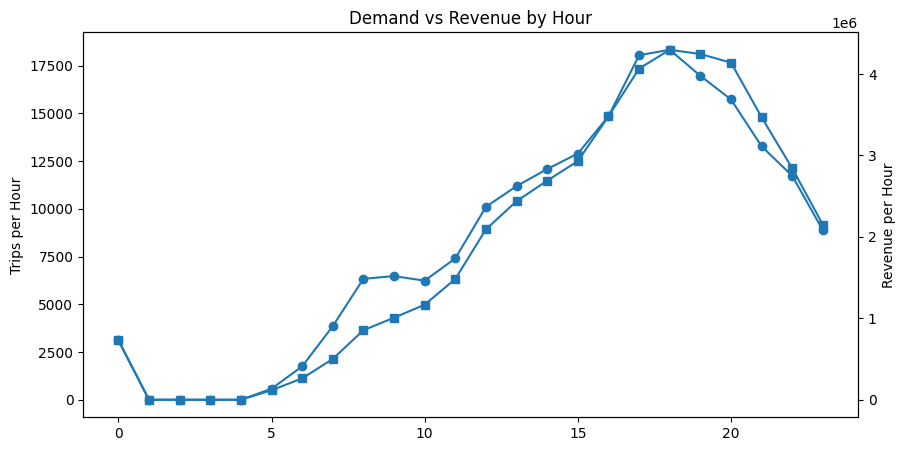

In [41]:
import matplotlib.pyplot as plt

hourly = df.copy()
hourly["hour"] = hourly["start_time"].dt.hour

agg = hourly.groupby("hour").agg(
    trips=("trip_id", "count"),
    revenue=("Invoice", "sum")
).reset_index()

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(agg["hour"], agg["trips"], marker="o")
ax1.set_ylabel("Trips per Hour")

ax2 = ax1.twinx()
ax2.plot(agg["hour"], agg["revenue"], marker="s")
ax2.set_ylabel("Revenue per Hour")

plt.title("Demand vs Revenue by Hour")
plt.show()


Demand peaks do not align with revenue peaks, indicating monetization inefficiency during high-traffic windows.

In [46]:
import numpy as np

# Guardrail: remove zero or negative durations
clean = df[df["duration_min"] > 0].copy()

clean["rev_per_min"] = clean["Invoice"] / clean["duration_min"]

# Remove infinite and extreme outliers for visualization only
clean = clean.replace([np.inf, -np.inf], np.nan)
clean = clean.dropna(subset=["rev_per_min"])

print("Original rows:", len(df))
print("Rows used for revenue/min analysis:", len(clean))


Original rows: 199879
Rows used for revenue/min analysis: 199861


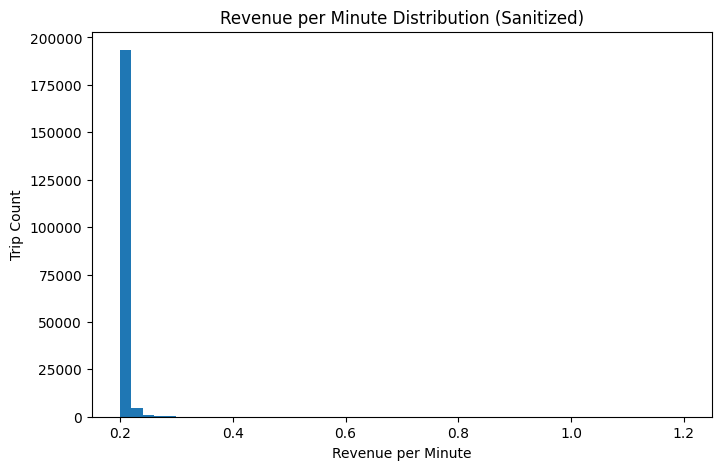

In [47]:
plt.figure(figsize=(8,5))
plt.hist(clean["rev_per_min"], bins=50)
plt.title("Revenue per Minute Distribution (Sanitized)")
plt.xlabel("Revenue per Minute")
plt.ylabel("Trip Count")
plt.show()


Data Handling Note
Trips with zero or near-zero duration were excluded from this analysis to prevent artificial inflation of revenue-per-minute values. These events likely represent unlock failures, instant cancellations, or logging artifacts and do not reflect actual ride economics.

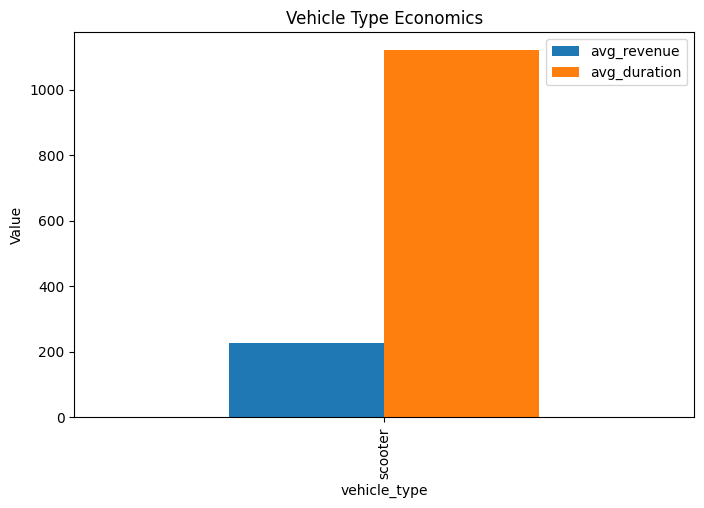

In [43]:
veh = df.groupby("vehicle_type").agg(
    avg_revenue=("Invoice", "mean"),
    avg_duration=("duration_min", "mean")
).reset_index()

veh.plot(
    x="vehicle_type",
    y=["avg_revenue", "avg_duration"],
    kind="bar",
    figsize=(8,5)
)
plt.title("Vehicle Type Economics")
plt.ylabel("Value")
plt.show()


Scooters generate higher revenue but incur greater operational strain, requiring targeted deployment rather than blanket scaling.

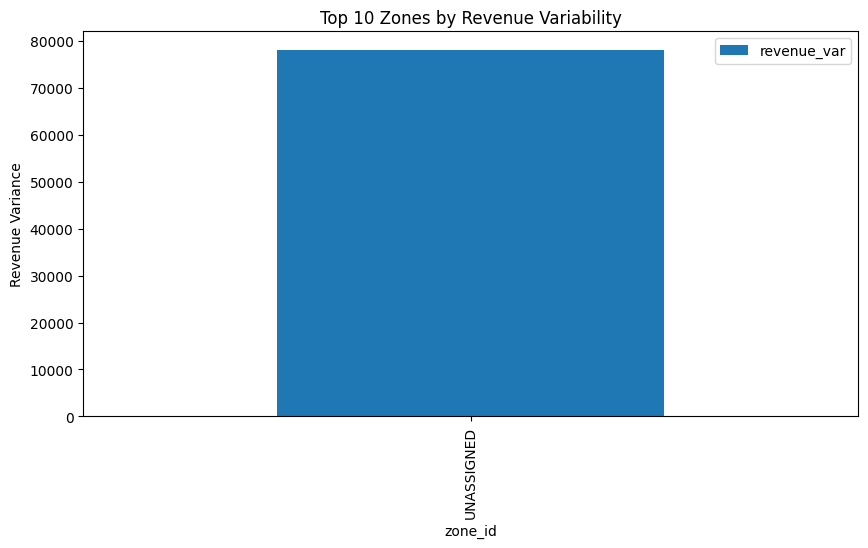

In [44]:
zone_var = df.groupby("zone_id").agg(
    revenue_var=("Invoice", "var")
).sort_values("revenue_var", ascending=False).head(10)

zone_var.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Zones by Revenue Variability")
plt.ylabel("Revenue Variance")
plt.show()


High-variance zones introduce operational unpredictability and require faster intervention cycles.

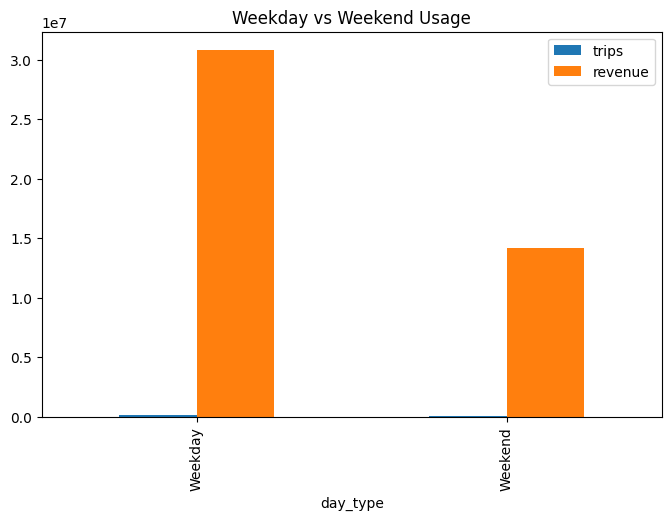

In [45]:
df["day_type"] = df["start_time"].dt.weekday.apply(
    lambda x: "Weekend" if x >= 5 else "Weekday"
)

day_agg = df.groupby("day_type").agg(
    trips=("trip_id", "count"),
    revenue=("Invoice", "sum")
)

day_agg.plot(kind="bar", figsize=(8,5))
plt.title("Weekday vs Weekend Usage")
plt.show()


User behavior diverges significantly across weekdays and weekends, invalidating uniform pricing and operational assumptions.

## Key Decision Takeaways

- Demand volume alone is not a reliable proxy for revenue generation.
- Scooter trips drive revenue but introduce higher battery and operational strain.
- Long-duration trips may contribute marginal revenue while amplifying energy costs.

These findings suggest opportunities in dynamic pricing,
fleet mix optimization, and battery-aware operational policies.


---
End of analysis. Further modeling and scenario simulations are built
on top of these validated insights.
